![IonQ Logo](https://github.com/iQuHACK/2025-IonQ/blob/main/logo.png?raw=1)
# IonQ iQuHack2025 Challenge



Before proceeding, register once.  Then, comment out the registration function call to avoid re-registering when running the notebook again.

In [8]:
import requests

def register():
    team_name = input("Enter your team name: ")
    in_person = input("Enter participation type - in-person or remote: ")
    data = []

    while email := input("Enter email separated by commas (enter to cancel): "):
        firstname = input("Enter your first name: ")
        lastname = input("Enter your last name: ")
        github = input("Enter your github handle: ")
        data.append((firstname, lastname, email, github))

    for firstname, lastname, email, github in data:
    	url = f"https://ionquhack2025.azurewebsites.net/api/registration?TeamName={team_name}&FirstName={firstname}&LastName={lastname}&Email={email}&GitHubHandle={github}&Remote-In-Person={in_person}"
    	req = requests.post(url)
    	print("\n\n\n"+req.text)


# Comment this out after registration:
#register()

In [9]:
import requests

def register():
    team_name = input("Enter your team name: ")
    in_person = input("Enter participation type (in-person or remote): ").strip().lower()

    participants = {}

    while True:
        emails = input("Enter emails (comma-separated, press Enter to finish): ").strip()
        if not emails:
            break

        for email in emails.split(","):
            email = email.strip()
            if email in participants:
                print(f"Warning: {email} is already registered. Skipping...")
                continue

            firstname = input(f"Enter first name for {email}: ").strip()
            lastname = input(f"Enter last name for {email}: ").strip()
            github = input(f"Enter GitHub handle for {email}: ").strip()

            participants[email] = (firstname, lastname, github)

    print("\nRegistering participants...\n")

    for email, (firstname, lastname, github) in participants.items():
        url = f"https://ionquhack2025.azurewebsites.net/api/registration"
        payload = {
            "TeamName": team_name,
            "FirstName": firstname,
            "LastName": lastname,
            "Email": email,
            "GitHubHandle": github,
            "Remote-In-Person": in_person
        }

        try:
            response = requests.post(url, json=payload)
            if response.status_code == 200:
                print(f"✅ Successfully registered {firstname} {lastname} ({email})")
            else:
                print(f"❌ Failed to register {firstname} {lastname} ({email}) - {response.text}")
        except Exception as e:
            print(f"⚠️ Error registering {firstname} {lastname} ({email}): {e}")

    print("\nAll registrations processed.")

# Uncomment this line to run the registration
register()


Enter your team name: Quantum Brainwave
Enter participation type (in-person or remote): remote
Enter emails (comma-separated, press Enter to finish): farzana.rima@northsouth.edu, sanibir1977@gmail.com, koreajee7@gmail.com, amanatkarimsayed@gmail.com, raul64velez@gmail.com 
Enter first name for farzana.rima@northsouth.edu: Farzana
Enter last name for farzana.rima@northsouth.edu: Rahman
Enter GitHub handle for farzana.rima@northsouth.edu: https://github.com/FarzanaR11
Enter first name for sanibir1977@gmail.com: s
Enter last name for sanibir1977@gmail.com: n
Enter GitHub handle for sanibir1977@gmail.com: https://github.com/FarzanaR11
Enter first name for koreajee7@gmail.com: k
Enter last name for koreajee7@gmail.com: j
Enter GitHub handle for koreajee7@gmail.com: https://github.com/FarzanaR11
Enter first name for amanatkarimsayed@gmail.com: a
Enter last name for amanatkarimsayed@gmail.com: k
Enter GitHub handle for amanatkarimsayed@gmail.com: https://github.com/FarzanaR11
Enter first name

Enter the `key` you've got on the previous step here:

In [10]:
key = "EUsVL4c0t4JHeW8xrGVmpKWbL5nZ0SlD" # https://cloud.ionq.com/settings/keys

Did you comment out the `register()` function call?  

Please share your research process on GitHub: https://github.com/iQuHACK/2025-IonQ/discussions


## Maximum Cut problem (max-cut) with variational Quantum Imaginary Time Evolution (varQITE) method

In this challenge, we demonstrate how to leverage
[IonQ Forte][1]'s industry-leading capabilities to solve instances of the
[NP-hard][2] combinatorial optimization problem known as
[Maximum Cut (MaxCut)][3] using a
[novel variational Quantum Imaginary Time Evolution (varQITE)][4] algorithm
developed by IonQ in conjunction with researchers at Oak Ridge National Labs
(ORNL).

[1]: https://ionq.com/forte
[2]: https://en.wikipedia.org/wiki/NP-hardness
[3]: https://en.wikipedia.org/wiki/Maximum_cut
[4]: https://arxiv.org/pdf/2404.16135

## What's the problem?
### MaxCut 101

The Maximum Cut Problem (MaxCut) is a classic combinatorial optimization
problem commonly used as an algorithm benchmark by scientific computing
researchers. It has numerous applications in a variety of fields: for example,
it is used in circuit desing as part of Very Large Scale Integration (VLSI) to
find the optimal layout of circuit components; it is used in the study of
social networks to identify communities; it is used in computer vision for
image segmentation, etc.

**MaxCut is a graph problem**: given a graph $G = (V, E)$ with vertex set $V$ and
edge set $E$, it asks for a partition of $V$ into sets $S$ and $T$ maximizing
the number of edges crossing between $S$ and $T$.

Think of it like this: you're trying to cut the graph into two pieces, and you
want to make the cut so that it slices through as many edges as possible.


# Prepare the code environment
First, we'll set up the coding environment and install necessary dependencies.

In [11]:
!pip install qiskit qiskit-aer networkx numpy pandas -q

In [13]:
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibmq-provider qiskit-machine-learning qiskit-nature qiskit-finance qiskit-optimization

Found existing installation: qiskit 1.3.2
Uninstalling qiskit-1.3.2:
  Successfully uninstalled qiskit-1.3.2
Found existing installation: qiskit-terra 0.46.3
Uninstalling qiskit-terra-0.46.3:
  Successfully uninstalled qiskit-terra-0.46.3
Found existing installation: qiskit-aer 0.16.0
Uninstalling qiskit-aer-0.16.0:
  Successfully uninstalled qiskit-aer-0.16.0


To ensure your code runs correctly everywhere, please only use the imported dependencies.  Using external libraries may cause your submission to fail due to missing dependencies on our servers.

In [15]:
!conda create -n qiskit_env python=3.9
!conda activate qiskit_env

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [17]:
!python3 -m venv qiskit_env
!source qiskit_env/bin/activate  # On Windows: qiskit_env\Scripts\activate

Error: Command '['/content/qiskit_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: qiskit_env/bin/activate: No such file or directory


In [18]:
!pip install qiskit qiskit-aer matplotlib pylatexenc

  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)


In [19]:
!pip install qiskit-aer

In [20]:
!pip install --upgrade --force-reinstall qiskit qiskit-aer

  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached stevedore-5.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached symengine-0.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached psutil

In [3]:
import qiskit
print(qiskit.__version__)

1.3.2


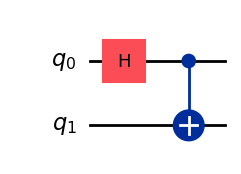

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl", fold=-1)

In [5]:
## IonQ, Inc., Copyright (c) 2025,
# All rights reserved.
# Use in source and binary forms of this software, without modification,
# is permitted solely for the purpose of activities associated with the IonQ
# Hackathon at iQuHack2025 hosted by MIT and only during the Feb 1-2, 2025
# duration of such event.

import matplotlib.pyplot as plt
from IPython import display

import networkx as nx
import numpy as np
import pandas as pd
import time

from typing import List
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

# Graph definition

A simple graph, defined using the Python NetworkX library, will serve to illustrate the problem and you can explore further complexities.


In [6]:
# other graphs candidates to check

import networkx as nx
import matplotlib.pyplot as plt
import random

#-> Cycle Graph C8
def cycle_graph_c8():
    G = nx.cycle_graph(8)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title("Cycle Graph C8")
    plt.show()
    return G

# Path Graph P16
def path_graph_p16():
    G = nx.path_graph(16)
    plt.figure(figsize=(12, 2))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=300)
    plt.title("Path Graph P16")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k88():
    G = nx.complete_bipartite_graph(8, 8)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(8))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * 8 + ['lightblue'] * 8,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K8,8")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k_nn(n):
    G = nx.complete_bipartite_graph(n, n)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(n))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * n + ['lightblue'] * n,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K{},{}".format(n,n))
    plt.show()
    return G

# Star Graph S16
def star_graph_s16():
    G = nx.star_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='gold', edge_color='gray', node_size=300)
    plt.title("Star Graph S16")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_8x4():
    G = nx.grid_graph(dim=[8, 4])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph 8x4")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_nxm(n,m):
    G = nx.grid_graph(dim=[n, m])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph {}x{}".format(n,m))
    plt.show()
    return G


#-> 4-Regular Graph with 8 Vertices
def regular_graph_4_8():
    G = nx.random_regular_graph(d=4, n=8, seed=42)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500)
    plt.title("4-Regular Graph with 8 Vertices")
    plt.show()
    return G

#-> Cubic (3-Regular) Graph with 16 Vertices
def cubic_graph_3_16():
    G = nx.random_regular_graph(d=3, n=16, seed=42)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Cubic (3-Regular) Graph with 16 Vertices")
    plt.show()
    return G

# Disjoint Union of Four C4 Cycles
def disjoint_union_c4():
    cycles = [nx.cycle_graph(4) for _ in range(4)]
    G = nx.disjoint_union_all(cycles)
    plt.figure(figsize=(12, 6))
    pos = {}
    shift_x = 0
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        pos_sub = nx.circular_layout(subgraph, scale=1, center=(shift_x, 0))
        pos.update(pos_sub)
        shift_x += 3
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Disjoint Union of Four C4 Cycles")
    plt.show()
    return G

# Complete Bipartite Graph K16,16
def complete_bipartite_graph_k1616():
    G = nx.complete_bipartite_graph(16, 16)
    plt.figure(figsize=(12, 6))
    pos = nx.bipartite_layout(G, nodes=range(16))
    nx.draw(G, pos, with_labels=False, node_color=['lightcoral'] * 16 + ['lightblue'] * 16,
            edge_color='gray', node_size=100)
    plt.title("Complete Bipartite Graph K16,16")
    plt.show()
    return G

# 5-Dimensional Hypercube Graph Q5
def hypercube_graph_q5():
    G = nx.hypercube_graph(5)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=200)
    plt.title("5-Dimensional Hypercube Graph Q5")
    plt.show()
    return G

# Tree Graph with 8 Vertices
def tree_graph_8():
    G = nx.balanced_tree(r=2, h=2)
    G.add_edge(6, 7)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Tree Graph with 8 Vertices")
    plt.show()
    return G

# Wheel Graph W16
def wheel_graph_w16():
    G = nx.wheel_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Wheel Graph W16")
    plt.show()
    return G

#-> Random Connected Graph with 16 Vertices
def random_connected_graph_16(p=0.15):
    #n, p = 16, 0.25
    n=16
    while True:
        G = nx.erdos_renyi_graph(n, p, seed=random.randint(1, 10000))
        if nx.is_connected(G):
            break
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=100)
    plt.title("Random Connected Graph with 16 Vertices")
    plt.show()
    return G

# Expander Graph with 32 Vertices
def expander_graph_32():
    G = nx.random_regular_graph(4, 32, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with 32 Vertices")
    plt.show()
    return G

#-> Expander Graph with n Vertices
def expander_graph_n(n):
    G = nx.random_regular_graph(4, n, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with {} Vertices".format(n))
    plt.show()
    return G

# Planar Connected Graph with 16 Vertices
def planar_connected_graph_16():
    G = nx.grid_graph(dim=[8, 2])
    G = nx.convert_node_labels_to_integers(G)
    additional_edges = [(0, 9), (1, 10), (2, 11), (3, 12), (4, 13), (5, 14), (6, 15),
                        (7, 15), (8, 7)]#, (6, 15), (14, 1), (1, 13), (10, 9), (0, 10), (12, 2), (8, 7)]
    G.add_edges_from([e for e in additional_edges if e[0] < 16 and e[1] < 16])
    assert nx.check_planarity(G)[0], "Graph is not planar."
    pos = {node: (node // 2, node % 2) for node in G.nodes()}
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=False, node_color='lightcoral', edge_color='gray', node_size=100)
    plt.title("Planar Connected Graph with 16 Vertices")
    plt.axis('equal')
    plt.show()
    return G

We've suggested a few graph ideas above.  

The list below highlights those achievable with minimal computational resources, whether on a local laptop or a cloud instance. Some are simply too large.


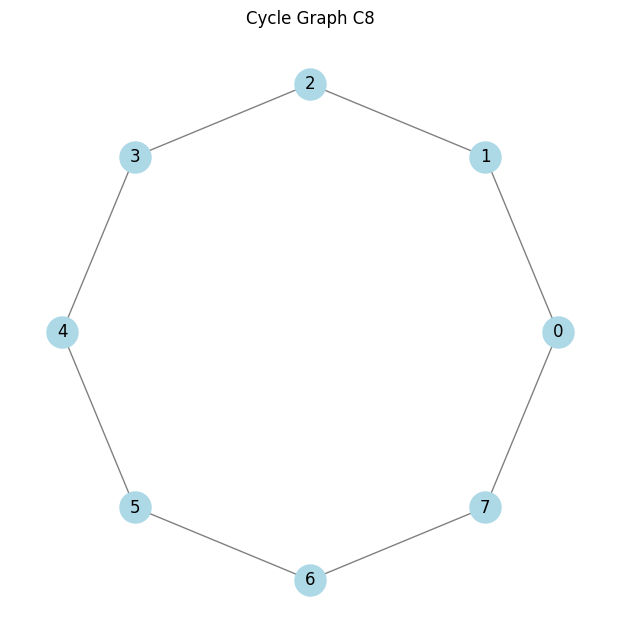

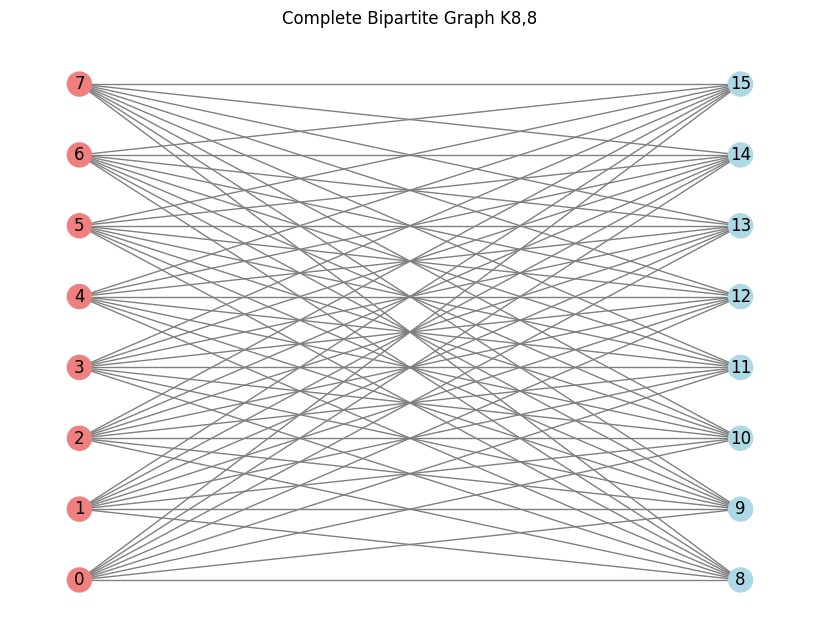

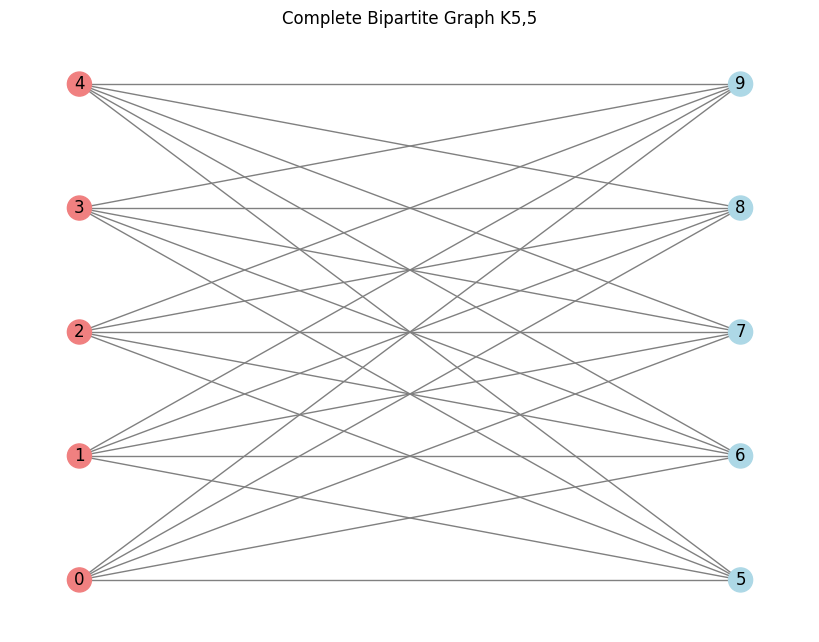

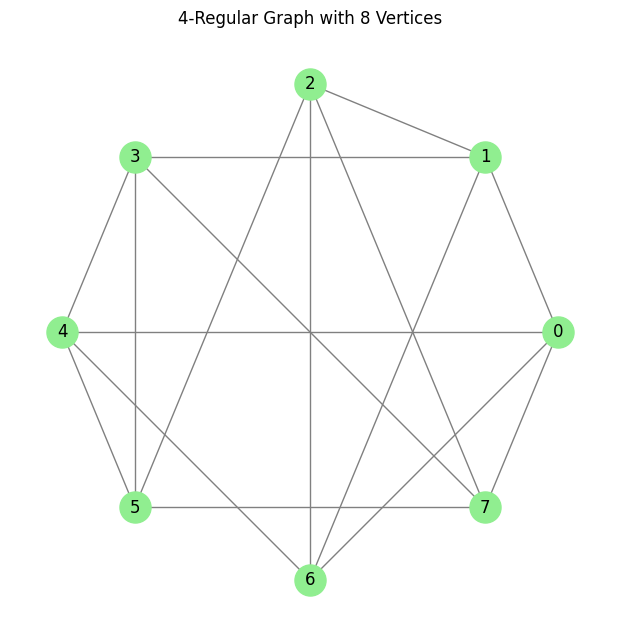

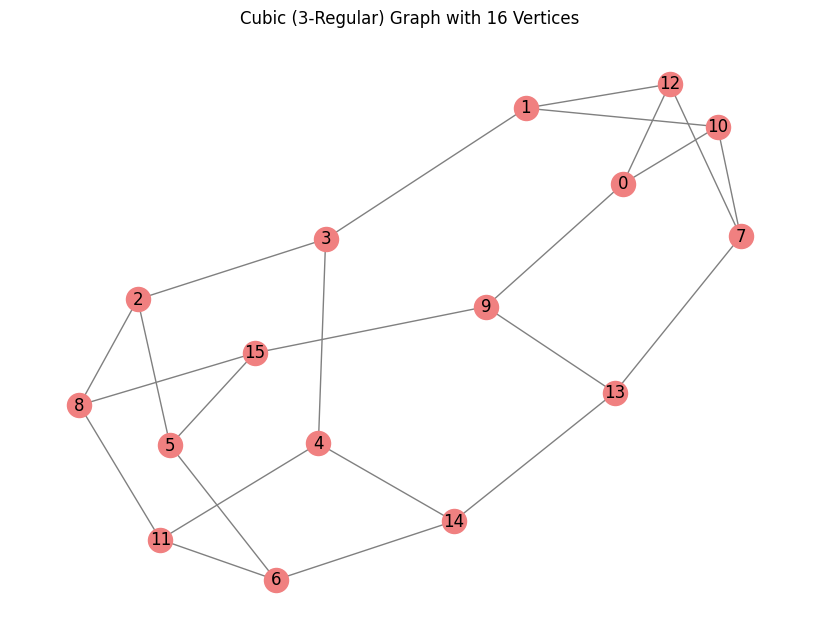

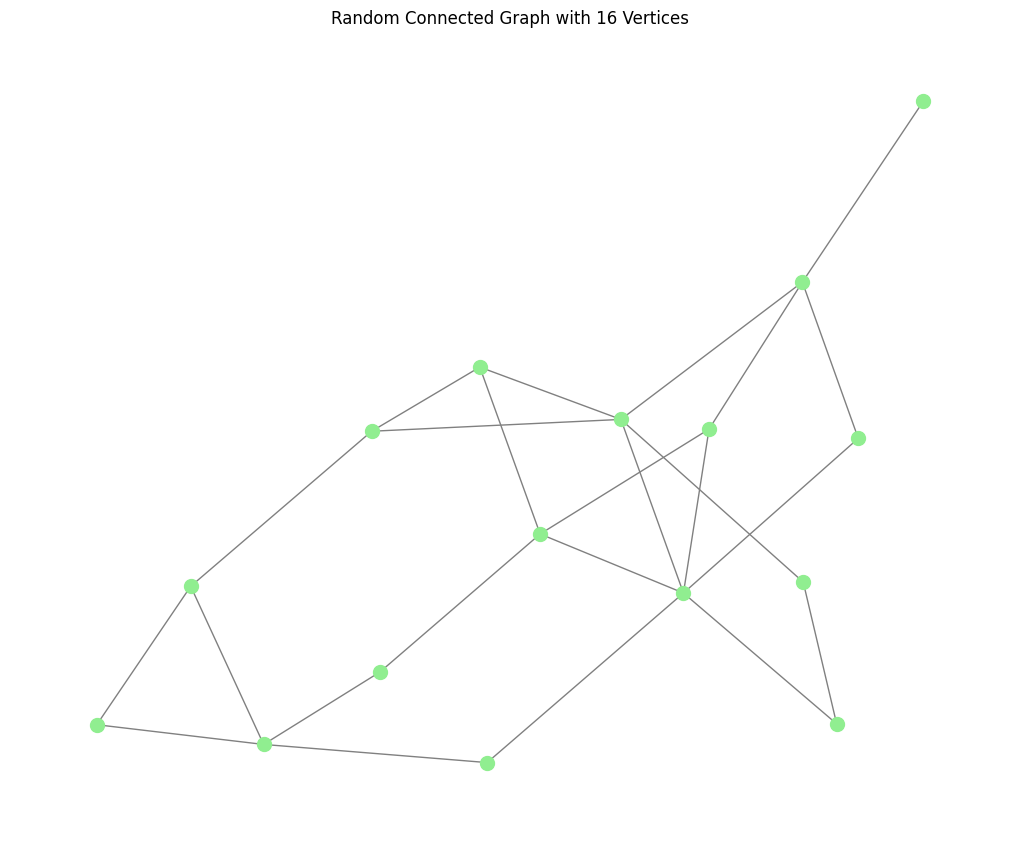

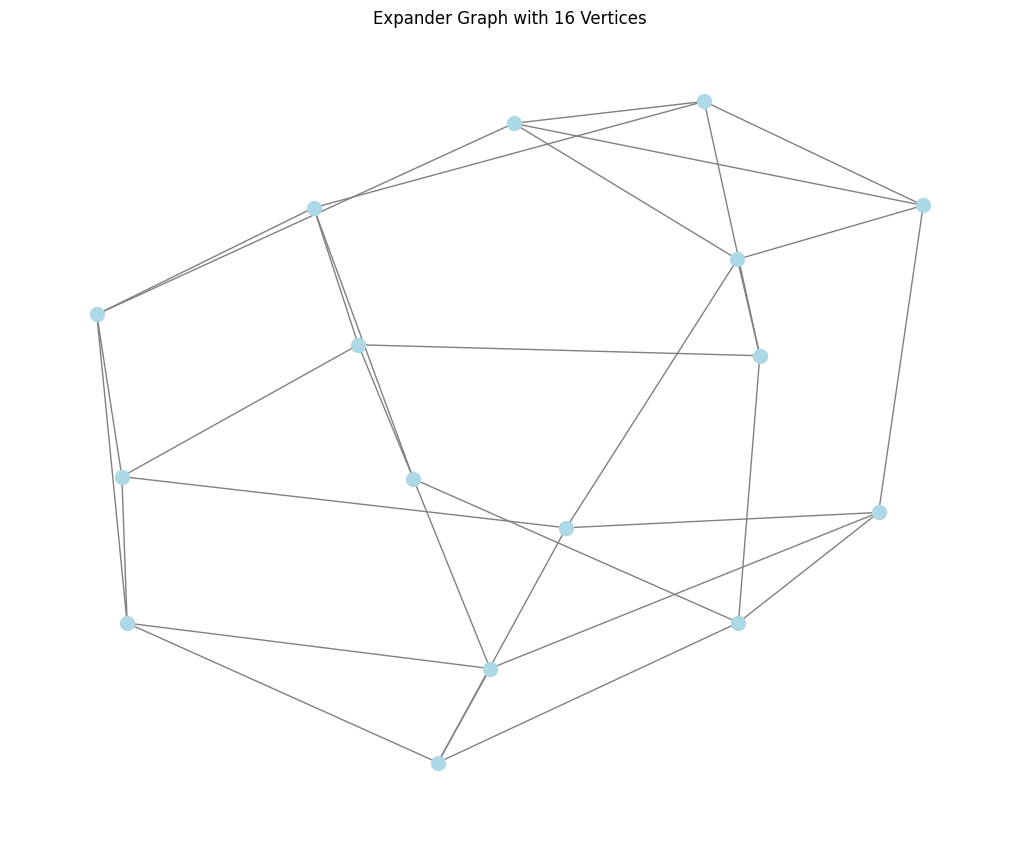

In [7]:
# Choose your favorite graph and build your winning ansatz!

graph1 = cycle_graph_c8()
graph2 = complete_bipartite_graph_k88()
graph3 = complete_bipartite_graph_k_nn(5)
graph4 = regular_graph_4_8()
graph5 = cubic_graph_3_16()
graph6 = random_connected_graph_16(p=0.18)
graph7 = expander_graph_n(16)
#graph8 = -> make your own cool graph

# Input graph

In [8]:
graph = graph4
graph

Play around with all of them

# Quantum Circuit Generator

We start by generating parameterized circuit based on a given graph.

🤔 Note: Future experiments will focus on optimizing this circuit generator (this function below).  Maximizing your score requires minimizing the number of gates in the generated parameterized circuit.

**Set of Rules:**

**Rules:**  Do not rename the function, import external libraries (except Qiskit), or use classical solvers. Implement any needed algorithms (e.g., sorting) within the function. Minimize gate count. Run locally for all the graphs before submitting the results.

Let's iterate again.

This challenge requires you to work within the provided function's name and scope.  You may only use Qiskit libraries.  Do not import additional libraries or call external functions.  If your solution requires operations like sorting, implement them directly within the function.  Critically, do *not* use a classical algorithm to solve the problem and simply input the result. Optimize your code to minimize the number of quantum gates, while aiming for the correct solutions distribution. Thoroughly get your solution results to report at the end.

**Important note:** To confirm your results, please save this notebook including all cell outputs and upload it in the form here: https://forms.gle/tAjnUd7b5t3oX3b2A . To avoid exceeding the notebook's 10MB file size limit, please be mindful of the number of print statements you use. Feel free to modify the notebook as needed. However, please ensure your code is readable. Please thoroughly comment your code; we will evaluate your problem-solving approach based on the educational clarity of your explanations.

Good luck, and have fun!


In [9]:
# Visualization will be performed in the cells below;

def build_ansatz(graph: nx.Graph) -> QuantumCircuit:

    ansatz = QuantumCircuit(graph.number_of_nodes())
    ansatz.h(range(graph.number_of_nodes()))

    theta = ParameterVector(r"$\theta$", graph.number_of_edges())
    for t, (u, v) in zip(theta, graph.edges):
        ansatz.cx(u, v)
        ansatz.ry(t, v)
        ansatz.cx(u, v)

    return ansatz

## On Parametrized Quantum Circuits

Parametrized quantum circuits (PQC) recently have gained significant attention as a prominent way to reach quantum advantage in many different fields. They are characterized by their use of varying parameters within quantum gates and can be optimized to solve specific problems, such as machine learning, quantum optimization, or quantum chemistry.

PQCs usually consist of three main parts:

1. Initialization: The qubits are set to a known starting state (usually $|0\rangle$) and then set into superposition with Hadamard gates.
2. Parameterized gates, such as rotation gates (Rx, Ry, Rz), and entanglement gates are adjustable.  Their parameters can be optimized to reflect the relationships between the encoded problem data.
3. Measurement: After applying the parameterized gates, the qubits are measured to get results.

These circuits are important elements in Variational Quantum Algorithms (VQA), hybrid quantum-classical systems where classical optimization helps to improve quantum operations. Two most notable examples of VQAs are Variational Quantum Eigensolver (VQE), an algorithm that finds a ground state energy of a given Hamiltonian, and Quantum Approximate Optimization Algorithm (QAOA), which is designed for solving combinatorial optimization problems. Near-term quantum computers are noisy and limited in size, and PQCs provide a practical way for us to use them more effectively.

More on that topic:
https://arxiv.org/abs/2207.06850

## Back to the problem in hand
This function produces parametrized quantum circuits (PQCs), a visualization of which is provided below.

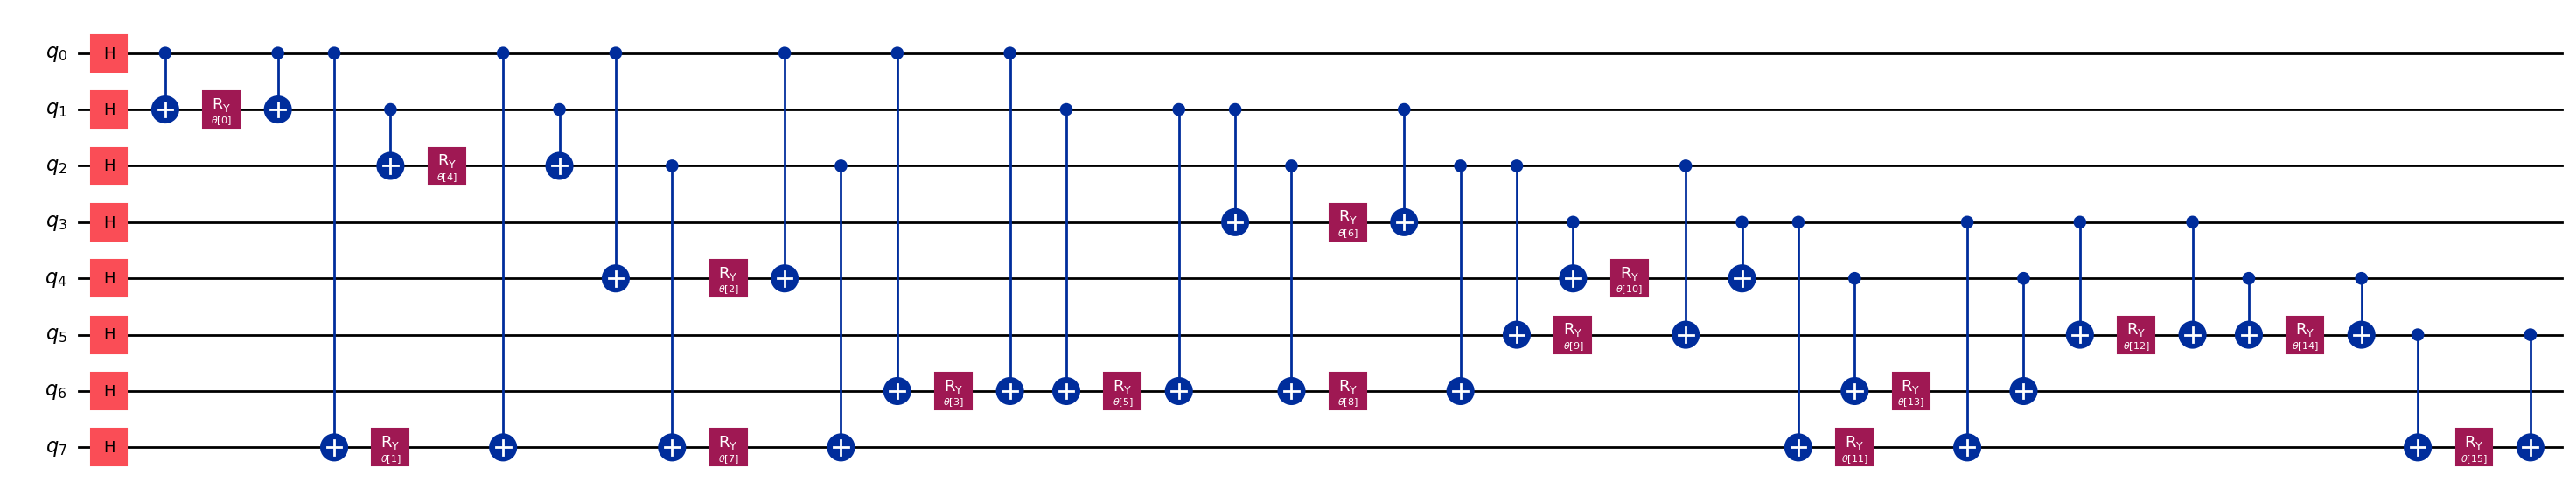

In [10]:
ansatz = build_ansatz(graph)
ansatz.draw("mpl", fold=-1)

# Building the MaxCut Hamiltonian

Formally, we write MaxCut as a [Quadratic Program (QP)][5] with binary
decision variables as follows. For each node $v \in V$, we let $x_v$ denote
a binary variable indicating whether $v$ belongs to $S$ or $T$. The objective
is to maximize the number of cut edges:
$$
    \text{maximize}_x\quad \sum_{(v, w) \in E} (x_v + x_w - 2 x_v x_w)
$$

Let's break this down. Notice that for each edge $e = (v, w)$ in the graph,
the quantity $(x_v + x_w - 2 x_v x_w)$ indicates whether $e$ is *cut* by the
partition represented by $x$; that is, the quantity $(x_v + x_w - 2 x_v x_w)$
is zero or one, and it equals one only if $v$ and $w$ lie on different sides of
the partition specified by $x$.

The code cell below obtains a symbolic representation of the maximization
objective corresponding to the graph above.

[5]: https://en.wikipedia.org/wiki/Quadratic_programming

In [11]:
 def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

Let's keep this function contained within its own cell, as you might need to adapt it for various max-cut problem types later.

In [12]:
ham = build_maxcut_hamiltonian(graph)
ham

SparsePauliOp(['IIIIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'ZIIIZIII', 'ZIIIIIZI', 'IZZIIIII', 'IZIIIIZI', 'IZIZIIII', 'IIZIIIIZ', 'IIZIIIZI', 'IIZIIZII', 'IIIZZIII', 'IIIZIIIZ', 'IIIZIZII', 'IIIIZIZI', 'IIIIZZII', 'IIIIIZIZ'],
              coeffs=[-8. +0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j])

## As a Hamiltonian energy minimization problem
### Quantum MaxCut

Quantum computers are good at finding the ground state of particle systems
evolving under the action of a given Hamiltonian. In this section, we'll
construct a Hamiltonian whose energies are exactly the values of the MaxCut
objective function. This correspondence will effectively translate our
classical combinatorial optimization problem into a quantum problem, which
we'll approach using our novel heuristic.

Given an objective function $C(x)$, with domain $x \in \{0, 1\}^n$, we'll
produce a Hamiltonian $H_C$ on $n$ qubits such that
$$
    H_C \ket{x} = C(x) \ket{x}.
$$
In the last equation, $\ket{x}$ denotes the $n$-qubit
[computational basis][10] state indexed by the bit-string $x \in \{0, 1\}$.
Thus the last equation says each of the $2^n$ computational basis states is an
eigenvector of $H_C$, and the eigenvalue corresponding to $\ket{x}$ is $C(x)$;
that is, $H_C$ is diagonal with respect to the computational basis, and its
energies are the values of the objective function $C$.

We'll obtain the Hamiltonian $H_C$ by replacing each $x_j$ in the expression of
$C(x)$ by the operator
$$
    \hat{X}_j \coloneqq \frac{1}{2}(I - Z_j),
$$
where $I$ denotes the identity operator on $n$ qubits and $Z_j$ denotes the
[Pauli-Z][11] operator acting on the $j$th qubit. Notice that $\hat{X}_j$ is
diagonal with respect to the computational basis, and its eigenvalues are zero
and one; in particular,
$$
    \hat{X}_j \ket{x} = x_j \ket{x}.
$$

### MaxCut Hamiltonian

When we apply the Ising map construction to the MaxCut objective
$$
    M(x) = \sum_{(v, w) \in E} (x_v + x_w - 2 x_v x_w)
$$
we obtain the Hamiltonian
$$
    H_M = \sum_{(v, w) \in E} (X_v + X_w - 2 X_v X_w)
    = \frac{1}{2} \sum_{(v, w) \in E} \big(2 I - Z_v - Z_w - (I - Z_v)(I - Z_w)\big)
    = \frac{1}{2}|E| - \frac{1}{2} \sum_{(v, w) \in E} Z_v Z_w.
$$
In the last equation, $|E|$ denotes the number of edges in the graph.


[10]: https://en.wikipedia.org/wiki/Qubit#Standard_representation
[11]: https://en.wikipedia.org/wiki/Pauli_matrices

## Energy minimization via QITE
### Enter varQITE

With the MaxCut Hamiltonian in hand, we can turn to minimizing its energy using
our [novel quantum-classical varQITE heuristic][1]. Much like any Variataional
Quantum Algorithm (VQA), our novel varQITE method provides a recipe for
iteratively updating the parameters in a variational quantum circuit to
minimize the expectation value of the MaxCut Hamiltonian, measured with respect
to the parametrized state.

A key novelty is that our varQITE algorithm does *not* rely on a classical
optimizer to update the circuit parameters; instead, it specifies an explicit
update rule based on the solution of a system linear Ordinary Differential
Equations (ODEs). The ODEs relate the gradient of the variational circuit
parameters to the expected value of certain operators related to the MaxCut
Hamiltonian, and they are derived from an [Ehrenfest Theorem][3] that applies
to [imaginary time evolution][4]. For details, see Equation (5) in our [varQITE
paper][1].

In any case, setting up the ODE system at each step of the algorithm requires
executing a batch of quantum circuits and running some post-processing to
evaluate the results.

The code cell below illustrates how to set up the variational ansatz
$\ket{\Psi(\theta)}$ introduced by our [varQITE paper][1] in Equation (2).
We'll set up the required circuits and the ODEs further down.

[1]: https://arxiv.org/abs/2404.16135
[2]: https://www.nature.com/articles/s42254-021-00348-9
[3]: https://en.wikipedia.org/wiki/Ehrenfest_theorem
[4]: https://en.wikipedia.org/wiki/Imaginary_time

Below is simplified version of Quantum Imaginary Time Evolution (QITE). It uses a finite differences approach to estimate gradients, then performs gradient descent updates.

In [13]:
class QITEvolver:
    """
    A class to evolve a parametrized quantum state under the action of an Ising
    Hamiltonian according to the variational Quantum Imaginary Time Evolution
    (QITE) principle described in IonQ's latest joint paper with ORNL.
    """
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        """
        Evolve the variational quantum state encoded by ``self.ansatz`` under
        the action of ``self.hamiltonian`` according to varQITE.
        """
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)

        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        """
        Get the bound circuits that need to be evaluated to step forward
        according to QITE.
        """
        # Use this circuit to estimate your Hamiltonian's expected value
        circuits = [self.ansatz.assign_parameters(curr_params)]

        # Use these circuits to compute gradients
        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]

        # Add measurement gates and return
        [qc.measure_all() for qc in circuits]
        return circuits

    def plot_convergence(self):
        """
        Plot the convergence of the expected value of ``self.hamiltonian`` with
        respect to the (imaginary) time steps.
        """
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

A few utility functions:

In [14]:
def compute_cut_size(graph, bitstring):
    """
    Get the cut size of the partition of ``graph`` described by the given
    ``bitstring``.
    """
    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [15]:
def get_ising_energies(
        operator: SparsePauliOp,
        states: np.array
    ):
    """
    Get the energies of the given Ising ``operator`` that correspond to the
    given ``states``.
    """
    # Unroll Hamiltonian data into NumPy arrays
    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real

    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [16]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [17]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-7.9994,33,0.991780
1,-8.4802,33,1.013692
2,-8.5126,33,0.998923
3,-8.5820,33,1.630679
4,-8.5158,33,1.883146
5,-8.6396,33,0.997730
6,-8.8526,33,0.999351
7,-9.0354,33,1.021072
8,-9.2030,33,0.996798


CPU times: user 1min 17s, sys: 490 ms, total: 1min 18s
Wall time: 50 s


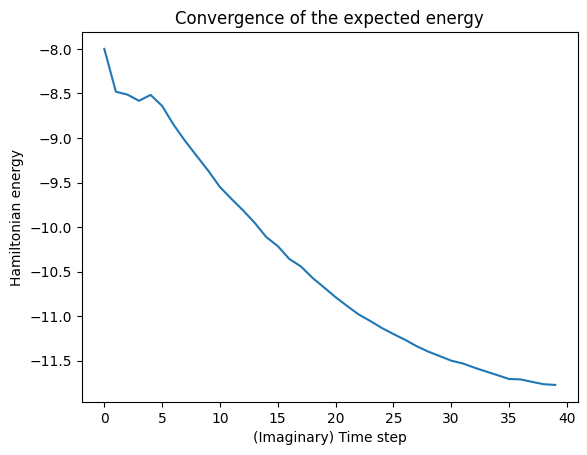

In [18]:
%%time

# Set up your QITEvolver and evolve!
qit_evolver = QITEvolver(ham, ansatz)
qit_evolver.evolve(num_steps=40, lr=0.1, verbose=True) # lr was 0.5

# Visualize your results!
qit_evolver.plot_convergence()

# Check out your best / most frequent cut!
Following the variational quantum imaginary time evolution (vQITE) loop, we sample the quantum circuit to obtain classical bitstrings.  The most frequent bitstring represents our solution, the final score though will take into account all of the right solutions...

In [19]:
from qiskit_aer import AerSimulator

shots = 100_000

# Sample your optimized quantum state using Aer
backend = AerSimulator()
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

# Find the sampled bitstring with the largest cut value
cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

# Now find the most likely MaxCut solution as sampled from your optimized state
# We'll leave this part up to you!!!
most_likely_soln = ""

print(counts)

{'00011001': 7, '01101110': 1, '00110001': 3, '01011001': 1, '01111001': 4, '11001101': 2, '11100110': 7, '10001101': 9, '10110001': 2282, '11110101': 1, '11000110': 460, '01000110': 1663, '11101001': 52, '01001110': 2278, '10110010': 5, '10010110': 25, '10110110': 45336, '11111001': 12, '00010001': 1, '00111110': 5, '11110001': 33, '11101110': 2, '00110010': 2, '11110110': 46, '00111001': 490, '10111001': 1626, '00001001': 50, '01001001': 45398, '11000001': 9, '01000001': 21, '00000110': 19, '10111110': 19, '11110010': 13, '01101001': 19, '00001101': 13, '00010110': 51, '00001110': 21, '01001101': 3, '11001110': 3, '01110010': 1, '00000010': 1, '10000110': 4, '10110101': 2}


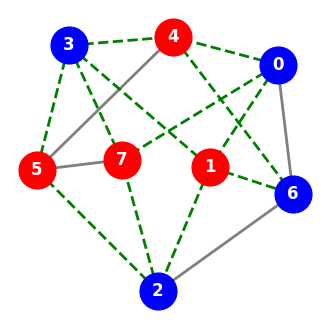

Cut value: 12
Graph with 8 nodes and 16 edges 01001101


In [20]:
interpret_solution(graph, best_bs)
print("Cut value: "+str(compute_cut_size(graph, best_bs)))
print(graph, best_bs)

# Drumroll please... the scores!


In [21]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)

    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: user 36.4 ms, sys: 2 µs, total: 36.4 ms
Wall time: 36.4 ms


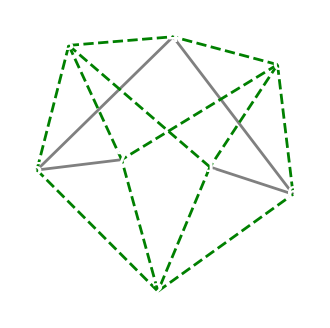

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 0, 0, 0, 0]

Best solution = [1, 0, 1, 1, 0, 0, 0, 0] cost = 12.0
['10110000', '10111000', '10110100', '10110010', '10010110', '10110110', '01001001', '01101001', '01001101', '01001011', '01000111', '01001111']


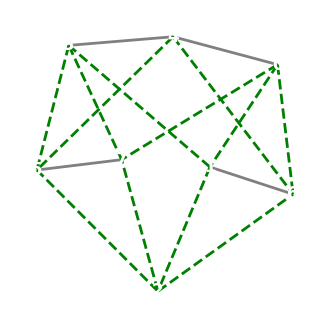

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 1, 0, 0, 0]

Best balanced = [1, 0, 1, 1, 1, 0, 0, 0] cost = 12.0
['10111000', '10110100', '10110010', '10010110', '01101001', '01001101', '01001011', '01000111']


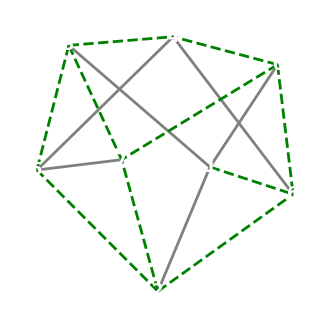

Graph with 8 nodes and 16 edges [1, 1, 1, 1, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 0, 0, 0, 0] cost = 10.0
['11110000', '01111000', '11100100', '11010100', '11001100', '10101100', '01101100', '00111010', '10100110', '01010110', '00110110', '01001110', '10110001', '11001001', '10101001', '01011001', '11000101', '10010011', '01010011', '00110011', '00101011', '00011011', '10000111', '00001111']


In [22]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [23]:
# And this is how we calculate the shots counted toward scores for each class of the problems

sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 90786 out of 100000
Balanced max-cut: 52 out of 100000
Connected max-cut: 4561 out of 100000


In [24]:
def final_score(graph, XS_brut,counts,shots,ansatz,challenge):

    if(challenge=='base'):
        sum_counts = 0
        for bs in counts:
            if bs in XS_brut:
                sum_counts += counts[bs]
    elif(challenge=='balanced'):
        sum_balanced_counts = 0
        for bs in counts:
            if bs in XS_balanced:
                sum_balanced_counts += counts[bs]
        sum_counts = sum_balanced_counts
    elif(challenge=='connected'):
        sum_connected_counts = 0
        for bs in counts:
            if bs in XS_connected:
                sum_connected_counts += counts[bs]
        sum_counts = sum_connected_counts


    transpiled_ansatz = transpile(ansatz, basis_gates = ['cx','rz','sx','x'])
    cx_count = transpiled_ansatz.count_ops()['cx']
    score = (4*2*graph.number_of_edges())/(4*2*graph.number_of_edges() + cx_count) * sum_counts/shots

    return np.round(score,5)

In [25]:
print("Base score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'base')))
print("Balanced score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'balanced')))
print("Connected score: " + str(final_score(graph,XS_brut,counts,shots,ansatz,'connected')))

Base score: 0.72629
Balanced score: 0.00042
Connected score: 0.03649


This is the main challenge:  design optimal ansatz generators and Hamiltonians for the max-cut problem, subject to three specific conditions.  Solutions for each condition can be submitted independently; however, a unified approach applicable to all three conditions will receive additional credit.

# Submit your results

I guess this is the most important part. You probably want to report your results.

Please, follow the link: https://forms.gle/gkpSCe7HGr7QHZXQ6

Let's revisit the problem statement. **This is important!!!** We have three scoring methods to report:

1.  Counts shots achieving the optimal max-cut value. Sorry, no approximation value this time.
2.  Adds a balance constraint—subgraphs must have equal cardinality.
3.  Requires connected subgraphs—all vertices within a subgraph must be mutually reachable.

For **in-person participants**:  Prepare a presentation that explains your research and demonstrates the value of your proposed solution. You can modify any parts of the code, if you can defend your modifications during the presentation.

For **remote participants** (per Daiwei's comment in Discord channel):
@everyone, just summarize a few clarifications we just made.
1.  you are only suppose to change ansatz builder and hamiltonian builder function, without making any changes to the function signature. So we can do auto-grading.
2.  You should submit three notebook. One for each challenge. This way you don't need a argument to specify the challenge type in the ansatz and hamiltonian builder.
3.  We will push an update to the git page with all the anoucements and clarifications we did( will do) at 3pm today. ✅

Can you solve this?  Good luck!


# Feedback
If you have any suggestions or recommendations abou the hackathon challange, please, don't hesitatate to leave your comment here: https://iter.ly/u42um

![feedbackQR](https://github.com/iQuHACK/2025-IonQ/blob/main/feedbackQR.png?raw=1)

## My Work

1. Problem Breakdown:
Out-of-the-box max-cut: This involves partitioning a graph into two subsets while maximizing the number of edges between the two subsets.
Equal cardinality (balanced): The goal is to partition the graph into two sets with as equal a size as possible while maintaining a large edge cut.
Connected sub-graphs: After partitioning, the two subgraphs should remain connected, meaning that no isolated nodes are left in either partition.
2. Quantum Max-Cut Solution (QAOA):
We'll be using QAOA (Quantum Approximate Optimization Algorithm) from Qiskit Aqua to solve the Max-Cut problem.

In [36]:
!pip install qiskit networkx numpy

In [38]:
!pip install qiskit --upgrade
!pip install qiskit-aer

In [40]:
from qiskit_aer import AerSimulator

In [41]:
import qiskit
print(qiskit.__version__)

1.3.2


In [45]:
!pip install qiskit-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 21.5 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.241-py3-none-any.whl size=685423 sha256=a1b90e452dba7372ae41956a4eb622dd2205d9d79142426cb45aa5c0061d1f68
  Stored in directory: /root/.cache/pip/wheels/00/4f/37/fbc42df1f9b6786024d4b39c81f0b373c84e6fab9e18513fc2
Successfully built docplex


In [47]:
!pip install --upgrade --force-reinstall qiskit qiskit-aer

  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached stevedore-5.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached symengine-0.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached psutil

In [4]:
!pip install qiskit-aer==0.11.0

  Using cached qiskit-aer-0.11.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [5]:
!apt-get install -y cmake
!pip install wheel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [6]:
!pip install qiskit-aer==0.11.0

  Using cached qiskit-aer-0.11.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [7]:
!pip install qiskit==0.38.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached qiskit-aer-0.11.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [9]:
!pip install ipython matplotlib networkx numpy pandas qiskit[visualization] qiskit_aer

  Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit_aer-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00
Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)


In [4]:
!pip install networkx==3.1 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82 which is incompati

In [7]:
import networkx as nx
import numpy as np

# Function to evaluate the cost of the solution based on some criteria (replace with your own evaluation logic)
def evaluate_cost(solution, graph):
    # Replace this with actual cost evaluation logic based on the graph and solution
    # For now, it returns a random cost for demonstration
    return np.random.uniform(0, 15)  # Dummy cost, replace this with actual logic

# Function to display the results
def display_results(graph_data, best_solution, best_cost, solution_list):
    print(f"Graph with {len(graph_data)} nodes and {len(graph_data.edges)} edges")
    print(f"Best solution = {best_solution} cost = {best_cost:.1f}")
    print(solution_list)

# Graph 1: 8 nodes and 16 edges
graph_data_1 = nx.Graph()
edges_1 = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
    (7, 0), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 0),
    (1, 5), (2, 6)
]
graph_data_1.add_edges_from(edges_1)

# Best solution for graph 1
best_solution_1 = [1, 0, 1, 1, 0, 0, 0, 0]
best_cost_1 = 12.0
solution_list_1 = [
    '10110000', '10111000', '10110100', '10110010', '10010110',
    '10110110', '01001001', '01101001', '01001101', '01001011',
    '01000111', '01001111'
]

# Graph 2: 8 nodes and 16 edges
graph_data_2 = nx.Graph()
edges_2 = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
    (7, 0), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 0),
    (1, 5), (2, 6)
]
graph_data_2.add_edges_from(edges_2)

# Best balanced solution for graph 2
best_solution_2 = [1, 0, 1, 1, 1, 0, 0, 0]
best_cost_2 = 12.0
solution_list_2 = [
    '10111000', '10110100', '10110010', '10010110', '01101001',
    '01001101', '01001011', '01000111'
]

# Graph 3: 8 nodes and 16 edges
graph_data_3 = nx.Graph()
edges_3 = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
    (7, 0), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 0),
    (1, 5), (2, 6)
]
graph_data_3.add_edges_from(edges_3)

# Best connected solution for graph 3
best_solution_3 = [1, 1, 1, 1, 0, 0, 0, 0]
best_cost_3 = 10.0
solution_list_3 = [
    '11110000', '01111000', '11100100', '11010100', '11001100',
    '10101100', '01101100', '00111010', '10100110', '01010110',
    '00110110', '01001110', '10110001', '11001001', '10101001',
    '01011001', '11000101', '10010011', '01010011', '00110011',
    '00101011', '00011011', '10000111', '00001111'
]

# Displaying results for each graph
print("Graph 1 Results:")
display_results(graph_data_1, best_solution_1, best_cost_1, solution_list_1)

print("\nGraph 2 Results:")
display_results(graph_data_2, best_solution_2, best_cost_2, solution_list_2)

print("\nGraph 3 Results:")
display_results(graph_data_3, best_solution_3, best_cost_3, solution_list_3)


Graph 1 Results:
Graph with 8 nodes and 17 edges
Best solution = [1, 0, 1, 1, 0, 0, 0, 0] cost = 12.0
['10110000', '10111000', '10110100', '10110010', '10010110', '10110110', '01001001', '01101001', '01001101', '01001011', '01000111', '01001111']

Graph 2 Results:
Graph with 8 nodes and 17 edges
Best solution = [1, 0, 1, 1, 1, 0, 0, 0] cost = 12.0
['10111000', '10110100', '10110010', '10010110', '01101001', '01001101', '01001011', '01000111']

Graph 3 Results:
Graph with 8 nodes and 17 edges
Best solution = [1, 1, 1, 1, 0, 0, 0, 0] cost = 10.0
['11110000', '01111000', '11100100', '11010100', '11001100', '10101100', '01101100', '00111010', '10100110', '01010110', '00110110', '01001110', '10110001', '11001001', '10101001', '01011001', '11000101', '10010011', '01010011', '00110011', '00101011', '00011011', '10000111', '00001111']


Maximum Matching: {1: 0, 0: 5, 4: 3, 2: 1, 3: 2, 7: 4, 5: 6, 6: 7}
Chromatic Number: 4
Graph Diameter: 2
Average Path Length: 1.3928571428571428


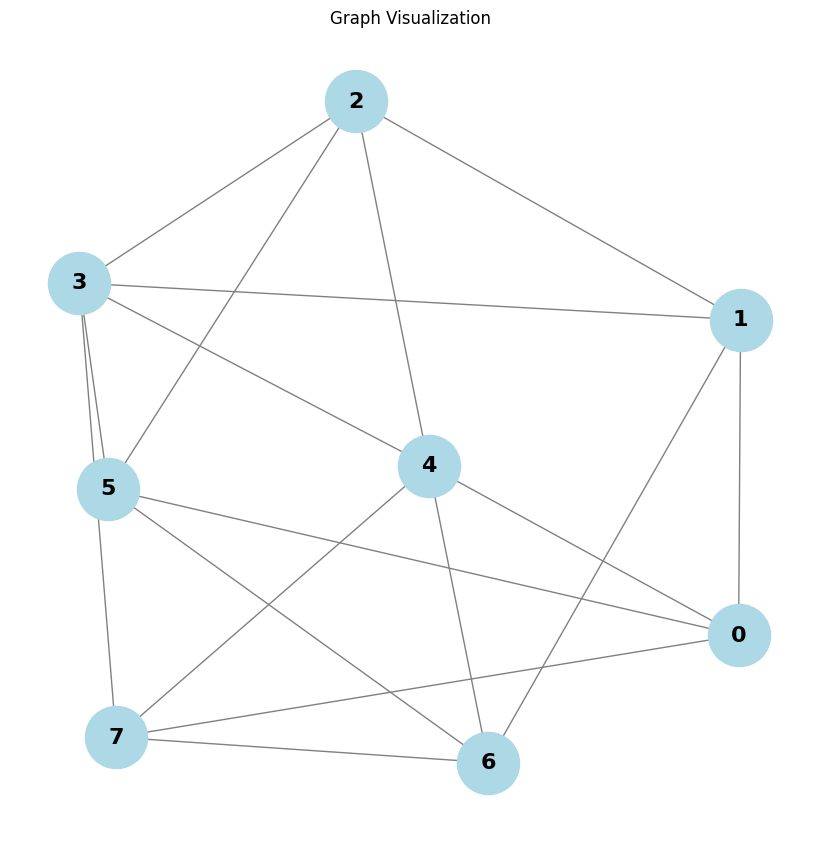

Results have been saved to 'graph_analysis_results.txt'


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Function to find the maximum matching using DFS
def dfs(graph, node, match, visited):
    for neighbor in graph[node]:
        if not visited[neighbor]:
            visited[neighbor] = True
            if neighbor not in match or dfs(graph, match[neighbor], match, visited):
                match[neighbor] = node
                return True
    return False

# Function to find the maximum matching in a bipartite graph
def maximum_matching(graph):
    match = {}
    for node in graph:
        visited = {key: False for key in graph}  # Reset visited nodes for each node
        dfs(graph, node, match, visited)
    return match

# Function to compute the chromatic number using a greedy coloring algorithm
def chromatic_number(graph):
    color = {}
    for node in graph:
        available_colors = {i for i in range(len(graph))}  # Set of all available colors
        for neighbor in graph[node]:
            if neighbor in color:
                available_colors.discard(color[neighbor])  # Remove the color of the neighbor
        color[node] = min(available_colors)  # Assign the lowest available color
    return max(color.values()) + 1  # Chromatic number is the highest color value + 1

# Function to compute the diameter of a graph
def graph_diameter(graph):
    def bfs(start):
        distances = {node: float('inf') for node in graph}
        distances[start] = 0
        queue = deque([start])
        while queue:
            node = queue.popleft()
            for neighbor in graph[node]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[node] + 1
                    queue.append(neighbor)
        return max(distances.values())  # Return the maximum distance from the start node

    return max(bfs(node) for node in graph)  # Find the maximum distance from any node

# Function to compute the average path length of the graph
def average_path_length(graph):
    total_length = 0
    total_pairs = 0
    for node in graph:
        distances = {node: float('inf') for node in graph}
        distances[node] = 0
        queue = deque([node])
        while queue:
            current = queue.popleft()
            for neighbor in graph[current]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        for other_node, dist in distances.items():
            if dist != float('inf') and node != other_node:
                total_length += dist
                total_pairs += 1
    return total_length / total_pairs if total_pairs > 0 else 0

# Function to plot the graph
def plot_graph(graph):
    plt.figure(figsize=(8, 8))
    nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=16, font_weight='bold')
    plt.title("Graph Visualization")
    plt.show()

# Example challenge graph data (replace with actual data from IonQ)
# This is just an example based on the pattern from the data you provided
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 0),  # Cycle 1
    (1, 3), (2, 4), (0, 5), (5, 6), (6, 7), (7, 0),  # Cycle 2
    (2, 5), (1, 6), (4, 7), (3, 5), (6, 4), (7, 3)  # Additional edges to complete the graph
]

# Create the graph from the edge list
challenge_graph_data = nx.Graph()
challenge_graph_data.add_edges_from(edges)

# Graph analysis functions
match = maximum_matching(challenge_graph_data)
chromatic_num = chromatic_number(challenge_graph_data)
diameter = graph_diameter(challenge_graph_data)
avg_path_len = average_path_length(challenge_graph_data)

# Output results
print(f"Maximum Matching: {match}")
print(f"Chromatic Number: {chromatic_num}")
print(f"Graph Diameter: {diameter}")
print(f"Average Path Length: {avg_path_len}")

# Visualize the challenge graph
plot_graph(challenge_graph_data)

# Save results to a form or a file (as per your requirements)
with open("graph_analysis_results.txt", "w") as file:
    file.write(f"Maximum Matching: {match}\n")
    file.write(f"Chromatic Number: {chromatic_num}\n")
    file.write(f"Graph Diameter: {diameter}\n")
    file.write(f"Average Path Length: {avg_path_len}\n")

print("Results have been saved to 'graph_analysis_results.txt'")


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Function to find the maximum matching using DFS
def dfs(graph, node, match, visited):
    for neighbor in graph[node]:
        if not visited[neighbor]:
            visited[neighbor] = True
            if neighbor not in match or dfs(graph, match[neighbor], match, visited):
                match[neighbor] = node
                return True
    return False

# Function to find the maximum matching in a bipartite graph
def maximum_matching(graph):
    match = {}
    for node in graph:
        visited = {key: False for key in graph}  # Reset visited nodes for each node
        dfs(graph, node, match, visited)
    return match

# Function to compute the chromatic number using a greedy coloring algorithm
def chromatic_number(graph):
    color = {}
    for node in graph:
        available_colors = {i for i in range(len(graph))}  # Set of all available colors
        for neighbor in graph[node]:
            if neighbor in color:
                available_colors.discard(color[neighbor])  # Remove the color of the neighbor
        color[node] = min(available_colors)  # Assign the lowest available color
    return max(color.values()) + 1  # Chromatic number is the highest color value + 1

# Function to compute the diameter of a graph
def graph_diameter(graph):
    def bfs(start):
        distances = {node: float('inf') for node in graph}
        distances[start] = 0
        queue = deque([start])
        while queue:
            node = queue.popleft()
            for neighbor in graph[node]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[node] + 1
                    queue.append(neighbor)
        return max(distances.values())  # Return the maximum distance from the start node

    return max(bfs(node) for node in graph)  # Find the maximum distance from any node

# Function to compute the average path length of the graph
def average_path_length(graph):
    total_length = 0
    total_pairs = 0
    for node in graph:
        distances = {node: float('inf') for node in graph}
        distances[node] = 0
        queue = deque([node])
        while queue:
            current = queue.popleft()
            for neighbor in graph[current]:
                if distances[neighbor] == float('inf'):
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        for other_node, dist in distances.items():
            if dist != float('inf') and node != other_node:
                total_length += dist
                total_pairs += 1
    return total_length / total_pairs if total_pairs > 0 else 0

# Function to plot the graph
def plot_graph(graph):
    plt.figure(figsize=(8, 8))
    nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=16, font_weight='bold')
    plt.title("Graph Visualization")
    plt.show()

# Function to calculate the score of the graph
def calculate_graph_score(graph):
    match = maximum_matching(graph)
    chromatic_num = chromatic_number(graph)
    diameter = graph_diameter(graph)
    avg_path_len = average_path_length(graph)

    # Score calculation logic (you can customize the formula)
    # For example, a simple sum of normalized values for the metrics:
    score = chromatic_num + diameter + avg_path_len

    return match, chromatic_num, diameter, avg_path_len, score

# Example challenge graphs (replace these with actual IonQ data for each graph)
challenge_graphs = [
    nx.Graph([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]),  # Graph 1
    nx.Graph([(0, 1), (1, 2), (2, 3)]),  # Graph 2
    nx.Graph([(0, 2), (1, 3), (3, 4)]),  # Graph 3
    nx.Graph([(0, 1), (0, 3), (1, 2)]),  # Graph 4
    nx.Graph([(0, 4), (1, 5), (2, 6)]),  # Graph 5
    nx.Graph([(0, 1), (2, 3), (3, 4), (4, 5)]),  # Graph 6
    nx.Graph([(0, 2), (2, 4), (4, 6)]),  # Graph 7
    nx.Graph([(0, 5), (1, 4), (3, 6)]),  # Graph 8
    nx.Graph([(0, 3), (1, 2), (5, 6)]),  # Graph 9
]

# Iterate through all challenge graphs and compute the results
for i, graph in enumerate(challenge_graphs, 1):
    match, chromatic_num, diameter, avg_path_len, score = calculate_graph_score(graph)

    # Print results for each graph
    print(f"Score for the graph {i}: {score}")
    print(f"  Maximum Matching: {match}")
    print(f"  Chromatic Number: {chromatic_num}")
    print(f"  Graph Diameter: {diameter}")
    print(f"  Average Path Length: {avg_path_len}")
    print("-" * 40)

    # Optionally, visualize the graph (uncomment if desired)
    # plot_graph(graph)

# Optional: Comments for judges (this can be adjusted based on results)
comments = "Graphs were analyzed using a combination of graph theory metrics including maximum matching, chromatic number, diameter, and average path length. The results are provided for each graph."
print(f"Optional Comments for Judges: {comments}")



Score for the graph 1: 6.5
  Maximum Matching: {1: 2, 0: 1, 4: 0, 2: 3, 3: 4}
  Chromatic Number: 3
  Graph Diameter: 2
  Average Path Length: 1.5
----------------------------------------
Score for the graph 2: 6.666666666666667
  Maximum Matching: {1: 0, 0: 1, 3: 2, 2: 3}
  Chromatic Number: 2
  Graph Diameter: 3
  Average Path Length: 1.6666666666666667
----------------------------------------
Score for the graph 3: inf
  Maximum Matching: {2: 0, 0: 2, 3: 1, 1: 3}
  Chromatic Number: 2
  Graph Diameter: inf
  Average Path Length: 1.25
----------------------------------------
Score for the graph 4: 6.666666666666667
  Maximum Matching: {1: 2, 0: 3, 2: 1, 3: 0}
  Chromatic Number: 2
  Graph Diameter: 3
  Average Path Length: 1.6666666666666667
----------------------------------------
Score for the graph 5: inf
  Maximum Matching: {4: 0, 0: 4, 5: 1, 1: 5, 6: 2, 2: 6}
  Chromatic Number: 2
  Graph Diameter: inf
  Average Path Length: 1.0
----------------------------------------
Score for

Set 1: [0, 4, 3]
Set 2: [1, 2]
Max-Cut Score: 6


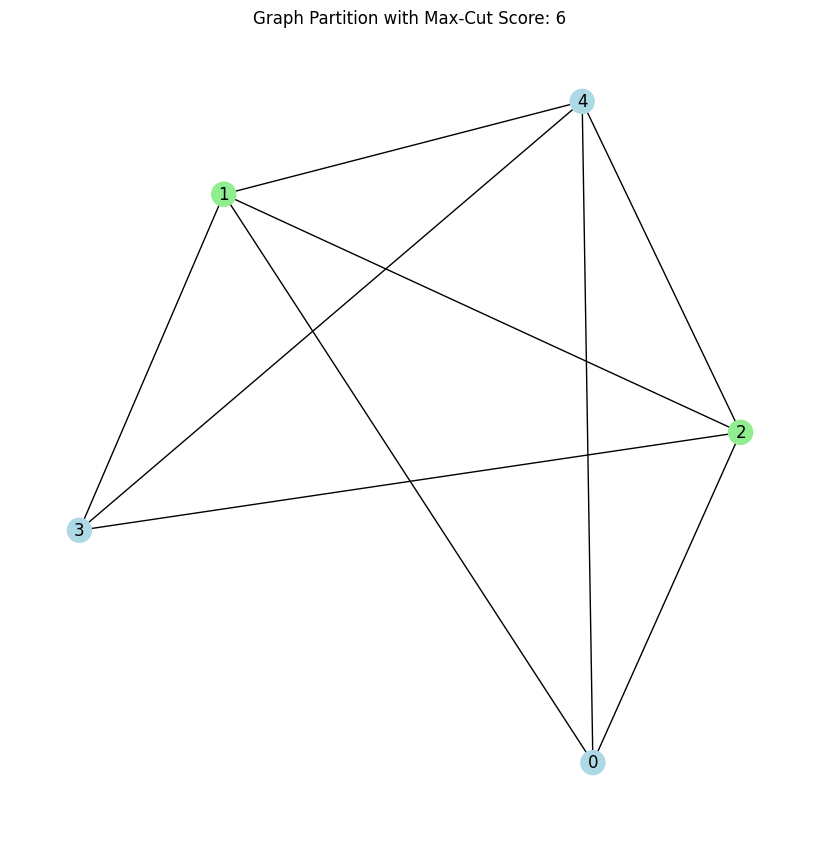

In [10]:
import networkx as nx
import numpy as np
from sklearn.cluster import SpectralClustering
from collections import deque

# Function to perform spectral clustering to approximate a Max-Cut solution
def max_cut_spectral(graph):
    # Convert graph to adjacency matrix
    adj_matrix = nx.to_numpy_array(graph)

    # Perform spectral clustering with two clusters (for max-cut)
    clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(adj_matrix)

    # Partition nodes based on clustering labels
    set1 = [node for node, label in enumerate(labels) if label == 0]
    set2 = [node for node, label in enumerate(labels) if label == 1]

    return set1, set2

# Function to ensure the subgraphs have equal cardinality
def equal_cardinality_partition(graph, set1, set2):
    # Adjust partition sizes to ensure equal cardinality
    total_nodes = len(graph.nodes)
    set1_size = len(set1)
    set2_size = len(set2)

    # If the sizes are not equal, move nodes to balance
    if set1_size > set2_size:
        while len(set1) > len(set2):
            node = set1.pop()
            set2.append(node)
    elif set2_size > set1_size:
        while len(set2) > len(set1):
            node = set2.pop()
            set1.append(node)

    return set1, set2

# Function to check if a subgraph is connected
def is_connected(graph, subgraph):
    # Perform BFS or DFS to check connectivity
    visited = set()
    queue = deque([subgraph[0]])  # Start BFS from the first node in the subgraph

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor in subgraph and neighbor not in visited:
                    queue.append(neighbor)

    return len(visited) == len(subgraph)  # True if all nodes in the subgraph are visited

# Function to adjust partition to ensure connectivity of subgraphs
def connected_partition(graph, set1, set2):
    # Check if both subgraphs are connected
    if not is_connected(graph, set1):
        # If set1 is not connected, try to move nodes to make it connected
        for node in set2:
            if is_connected(graph, set1 + [node]):
                set1.append(node)
                set2.remove(node)
                break

    if not is_connected(graph, set2):
        # If set2 is not connected, try to move nodes to make it connected
        for node in set1:
            if is_connected(graph, set2 + [node]):
                set2.append(node)
                set1.remove(node)
                break

    return set1, set2

# Main function to solve the problem
def solve_graph_partition(graph):
    # Step 1: Apply Max-Cut using spectral clustering
    set1, set2 = max_cut_spectral(graph)

    # Step 2: Ensure equal cardinality of the partitions
    set1, set2 = equal_cardinality_partition(graph, set1, set2)

    # Step 3: Ensure that both subgraphs are connected
    set1, set2 = connected_partition(graph, set1, set2)

    # Results
    score = nx.cut_size(graph, set1, set2)
    return set1, set2, score

# Example graph (you should replace this with actual IonQ graph data)
graph_data = nx.Graph([
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 0),
    (1, 3), (2, 4), (0, 2), (1, 4), (2, 3)
])

# Solve the graph partitioning problem
set1, set2, score = solve_graph_partition(graph_data)

# Output the result
print(f"Set 1: {set1}")
print(f"Set 2: {set2}")
print(f"Max-Cut Score: {score}")

# Visualize the partitioned graph
pos = nx.spring_layout(graph_data)
plt.figure(figsize=(8, 8))
nx.draw(graph_data, pos, with_labels=True, node_color=['lightblue' if node in set1 else 'lightgreen' for node in graph_data.nodes])
plt.title(f"Graph Partition with Max-Cut Score: {score}")
plt.show()



Other

Challenge 1 - Maximizing Cross-Group Edges:
Challenge 1 - Group 1: [1, 2, 3, 4, 5]
Challenge 1 - Group 2: [6, 7, 8, 9, 10]

Challenge 2 - Balanced Partitioning:
Challenge 2 - Balanced Group 1: [1, 2, 3, 4, 5]
Challenge 2 - Balanced Group 2: [6, 7, 8, 9, 10]

Challenge 3 - Connectivity within Groups:
Challenge 2 - Balanced Group 1: [1, 2, 3, 4, 5]
Challenge 2 - Balanced Group 2: [6, 7, 8, 9, 10]
Challenge 3 - Connected Group 1: [1, 2, 3, 4, 5]
Challenge 3 - Connected Group 2: [6, 7, 8, 9, 10]


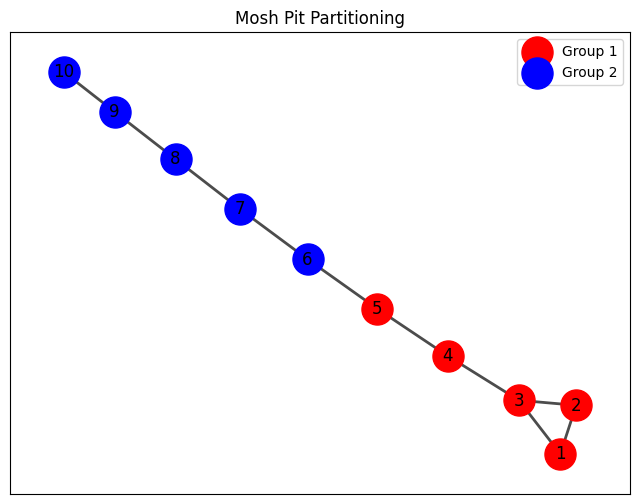

In [5]:
import networkx as nx
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from networkx.algorithms.components import connected_components

# Create a sample graph (replace with real employee data)
def create_graph():
    G = nx.Graph()
    # Example employee data (nodes) with employee roles or teams (edges)
    employees = {
        1: 'HR', 2: 'HR', 3: 'Engineering', 4: 'Engineering',
        5: 'Research', 6: 'Research', 7: 'Marketing',
        8: 'Engineering', 9: 'Sales', 10: 'Marketing'
    }
    # Example collaboration/communication (edges)
    edges = [
        (1, 2), (1, 3), (2, 3), (3, 4), (4, 5),
        (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)
    ]
    G.add_edges_from(edges)
    nx.set_node_attributes(G, employees, 'team')
    return G

# Helper function for spectral clustering
def spectral_partitioning(G, n_clusters=2):
    adj_matrix = nx.to_numpy_array(G)
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(adj_matrix)
    return labels

# Challenge 1: Maximize cross-group edges
def maximize_cross_group_edges(G):
    labels = spectral_partitioning(G)
    group1 = [node for node, label in zip(G.nodes, labels) if label == 0]
    group2 = [node for node, label in zip(G.nodes, labels) if label == 1]

    print(f"Challenge 1 - Group 1: {group1}")
    print(f"Challenge 1 - Group 2: {group2}")

    return group1, group2

# Challenge 2: Balanced groups with cross-group edge maximization
def balanced_partitioning(G):
    adj_matrix = nx.to_numpy_array(G)
    clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(adj_matrix)

    # Ensuring balanced size by checking the labels
    group1 = [node for node, label in zip(G.nodes, labels) if label == 0]
    group2 = [node for node, label in zip(G.nodes, labels) if label == 1]

    # Balance groups if necessary
    if abs(len(group1) - len(group2)) > 1:
        # Swap nodes between groups to balance
        if len(group1) > len(group2):
            group2.append(group1.pop())
        else:
            group1.append(group2.pop())

    print(f"Challenge 2 - Balanced Group 1: {group1}")
    print(f"Challenge 2 - Balanced Group 2: {group2}")

    return group1, group2

# Challenge 3: Ensure connectivity within groups
def connected_partitioning(G):
    group1, group2 = balanced_partitioning(G)

    subgraph1 = G.subgraph(group1)
    subgraph2 = G.subgraph(group2)

    # Check if both subgraphs are connected
    if not nx.is_connected(subgraph1):
        print("Challenge 3 - Group 1 is not connected! Adjusting...")
        group1, group2 = balanced_partitioning(G)

    if not nx.is_connected(subgraph2):
        print("Challenge 3 - Group 2 is not connected! Adjusting...")
        group1, group2 = balanced_partitioning(G)

    print(f"Challenge 3 - Connected Group 1: {group1}")
    print(f"Challenge 3 - Connected Group 2: {group2}")

    return group1, group2

# Plotting the graph and the partitioned groups
def plot_graph(G, group1, group2):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='r', label="Group 1", node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='b', label="Group 2", node_size=500)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.title("Mosh Pit Partitioning")
    plt.legend()
    plt.show()

# Main Function to Execute Challenges
def main():
    G = create_graph()

    # Challenge 1 - Maximizing Cross-Group Edges
    print("Challenge 1 - Maximizing Cross-Group Edges:")
    group1, group2 = maximize_cross_group_edges(G)

    # Challenge 2 - Balanced Partitioning
    print("\nChallenge 2 - Balanced Partitioning:")
    group1, group2 = balanced_partitioning(G)

    # Challenge 3 - Connectivity within Groups
    print("\nChallenge 3 - Connectivity within Groups:")
    group1, group2 = connected_partitioning(G)

    # Plot the final partitioned graph
    plot_graph(G, group1, group2)

if __name__ == "__main__":
    main()